In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

/opt/conda/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
def write_feature_importance(disease, X, indices, cols, importances, std, fout):
    for f in range(X.shape[1]):
        ls = (disease, cols[indices[f]], importances[indices[f]], std[indices[f]])
        print("panel\t%s\t%s\t%f\t%f" % ls, file=fout)

EPI
Feature ranking:
EPI 1. ccr (0.354841) std 0.181799
EPI 2. vest (0.315044) std 0.168161
EPI 3. fathmm (0.153860) std 0.080869
EPI 4. missense_depletion (0.094822) std 0.056730
EPI 5. missense_badness (0.048287) std 0.017606
EPI 6. is_domain (0.033146) std 0.019694


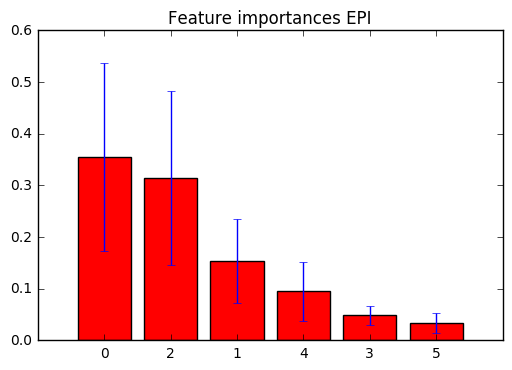

Cardiomyopathy
Feature ranking:
Cardiomyopathy 1. ccr (0.435100) std 0.145083
Cardiomyopathy 2. missense_depletion (0.210963) std 0.141531
Cardiomyopathy 3. vest (0.139640) std 0.075165
Cardiomyopathy 4. fathmm (0.107417) std 0.075826
Cardiomyopathy 5. missense_badness (0.060767) std 0.041099
Cardiomyopathy 6. is_domain (0.046113) std 0.028479


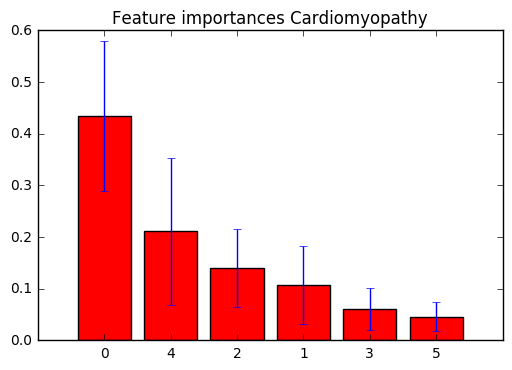

Rasopathies
Feature ranking:
Rasopathies 1. ccr (0.314541) std 0.174746
Rasopathies 2. vest (0.263493) std 0.146505
Rasopathies 3. missense_badness (0.159680) std 0.112334
Rasopathies 4. missense_depletion (0.119557) std 0.083526
Rasopathies 5. fathmm (0.108213) std 0.080633
Rasopathies 6. is_domain (0.034516) std 0.031314


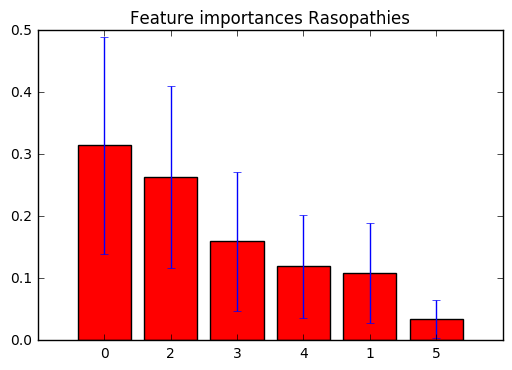

In [7]:
afile = '../data/interim/panel.dat'
df = pd.read_csv(afile, sep='\t')
cols = ['ccr', 'fathmm', 'vest', 'missense_badness', 'missense_depletion', 'is_domain']
fout = open('../data/interim/importance.panel', 'w')
header = ('eval_set', 'disease', 'feature', 'importance', 'std')
print('\t'.join(header), file=fout)

for disease in set(df['Disease']):
    print(disease)
    X = df[df.Disease==disease][cols]
    y = df[df.Disease==disease]['y']

    # Build a forest and compute the feature importances
    forest = ExtraTreesClassifier(n_estimators=250,
                                  random_state=0)

    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    print("Feature ranking:")
    write_feature_importance(disease, X, indices, cols, importances, std, fout)
    
    for f in range(X.shape[1]):
        print("%s %d. %s (%f) std %f" % (disease, f + 1, cols[indices[f]], importances[indices[f]], std[indices[f]]))

    plt.figure()
    plt.title("Feature importances " + disease)
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()
fout.close()

In [14]:
!jupyter nbconvert --to=python feature-importance.ipynb --stdout > test2.py

[NbConvertApp] Converting notebook feature-importance.ipynb to python
